In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(r"C:\Users\kadas\Desktop\These_CIFRE\RQR\data_good.xlsx")
data.head(2)

,POIDS_Amenageurs_urbanistes,POIDS_Promoteurs_investisseurs_conseils,POIDS_Services_municipaux,POIDS_Particuliers_hors_quartier,ATTR_Esthetique,ATTR_Offre_commerciale,ATTR_Offre_services,ATTR_Offre_loisirs,ATTR_Reputation,SOC_Exterieur,...,PROFIL_Experience_annees,StartDate,EndDate,Progress,Duration (in seconds),Finished,PROFIL_Profession_label,PROFIL_Experience_label,PROFIL_Genre_label,Duration_min
0,20.0,30.0,20.0,30.0,25.0,25.0,15.0,15.0,20.0,30.0,...,4.0,2024-08-23 14:15:11,2024-08-23 14:30:23,100,912,True,Promoteur / investisseur / conseil immobilier,Plus de 20 ans d'expertise,Homme,15.200000
1,35.0,15.0,40.0,10.0,25.0,20.0,25.0,10.0,20.0,25.0,...,4.0,2024-09-12 11:24:32,2024-09-12 12:06:08,100,2495,True,Promoteur / investisseur / conseil immobilier,Plus de 20 ans d'expertise,Homme,41.583333


## Qui sont les véritables experts de la qualité urbaine selon les citoyens ?

Identifier quel acteur est perçu comme le plus légitime pour juger la qualité urbaine, du point de vue des répondants.

In [5]:
data.columns

Index(['POIDS_Amenageurs_urbanistes',
       'POIDS_Promoteurs_investisseurs_conseils', 'POIDS_Services_municipaux',
       'POIDS_Particuliers_hors_quartier', 'ATTR_Esthetique',
       'ATTR_Offre_commerciale', 'ATTR_Offre_services', 'ATTR_Offre_loisirs',
       'ATTR_Reputation', 'SOC_Exterieur', 'SOC_Commerciale',
       'SOC_Mixite_logements', 'SOC_Connectee', 'FLU_Structuration_rues',
       'FLU_Intermodalite', 'FLU_Deambulation_pietons_PMR',
       'FLU_Mobilites_douces', 'FLU_Vehicules_motorises', 'SAL_Proprete',
       'SAL_Calme', 'SAL_Nature', 'SAL_Securite', 'QLT_VIE_Attractivite',
       'QLT_VIE_Sociabilites', 'QLT_VIE_Fluidite', 'QLT_VIE_Salubrite',
       'QLT_URB_Taille_humaine', 'QLT_URB_Compacite_multifonctionnelle',
       'QLT_URB_Coherence', 'QLT_URB_Mobilier_urbain', 'CFDD_Vegetalisation',
       'CFDD_Absence_pollutions', 'CFDD_Energies_durables',
       'CFDD_Gestion_durable_intelligente', 'CFDD_Ecosystemes_naturels',
       'PER_Capacite_evoluer', 'PER_Sante_b

In [8]:
cols_experts = [
    'POIDS_Amenageurs_urbanistes',
    'POIDS_Promoteurs_investisseurs_conseils',
    'POIDS_Services_municipaux',
    'POIDS_Particuliers_hors_quartier'
]
mean_points = data[cols_experts].mean()
mean_points


POIDS_Amenageurs_urbanistes                36.65625
POIDS_Promoteurs_investisseurs_conseils    24.46875
POIDS_Services_municipaux                  20.71875
POIDS_Particuliers_hors_quartier           18.15625
dtype: float64

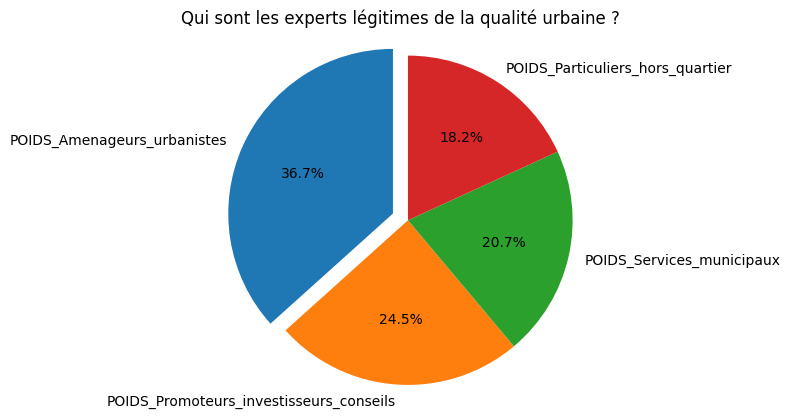

In [21]:
labels = mean_points.index.str.replace('100PTS_', '')
values = mean_points.values

plt.figure()
plt.pie(
    values,
    labels=labels,
    explode = [0.1, 0, 0, 0],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Qui sont les experts légitimes de la qualité urbaine ?")
plt.axis('equal')  # cercle parfait
plt.show()


En moyenne, les répondants estiment que les aménageurs et urbanistes sont les acteurs les plus légitimes pour évaluer la qualité d’un quartier (≈ 37 % du poids total)

## Qui fait confiance à qui, et selon quels profils ?

In [60]:
data['PROFIL_Genre_label'].value_counts()

PROFIL_Genre_label
Homme    23
Femme     8
Name: count, dtype: int64

In [61]:
data['PROFIL_Genre_label'].value_counts()
mean_by_genre = (
    data
    .groupby('PROFIL_Genre_label')[cols_experts]
    .mean()
)
mean_by_genre

,POIDS_Amenageurs_urbanistes,POIDS_Promoteurs_investisseurs_conseils,POIDS_Services_municipaux,POIDS_Particuliers_hors_quartier
PROFIL_Genre_label,,,,
Femme,41.000000,22.250000,21.625000,15.125000
Homme,35.652174,25.217391,20.217391,18.913043


In [62]:
data['PROFIL_Experience_label'].value_counts()
mean_by_experience = (
    data
    .groupby('PROFIL_Experience_label')[cols_experts]
    .mean()
)

In [63]:
mean_by_experience

,POIDS_Amenageurs_urbanistes,POIDS_Promoteurs_investisseurs_conseils,POIDS_Services_municipaux,POIDS_Particuliers_hors_quartier
PROFIL_Experience_label,,,,
De 10 à 20 ans d'expertise,37.500000,23.750000,13.75,25.000000
Moins de 10 ans d'expertise,40.500000,21.000000,24.50,14.000000
Pas d'expertise professionnelle,33.583333,29.833333,20.25,16.333333
Plus de 20 ans d'expertise,38.000000,19.000000,19.00,24.000000


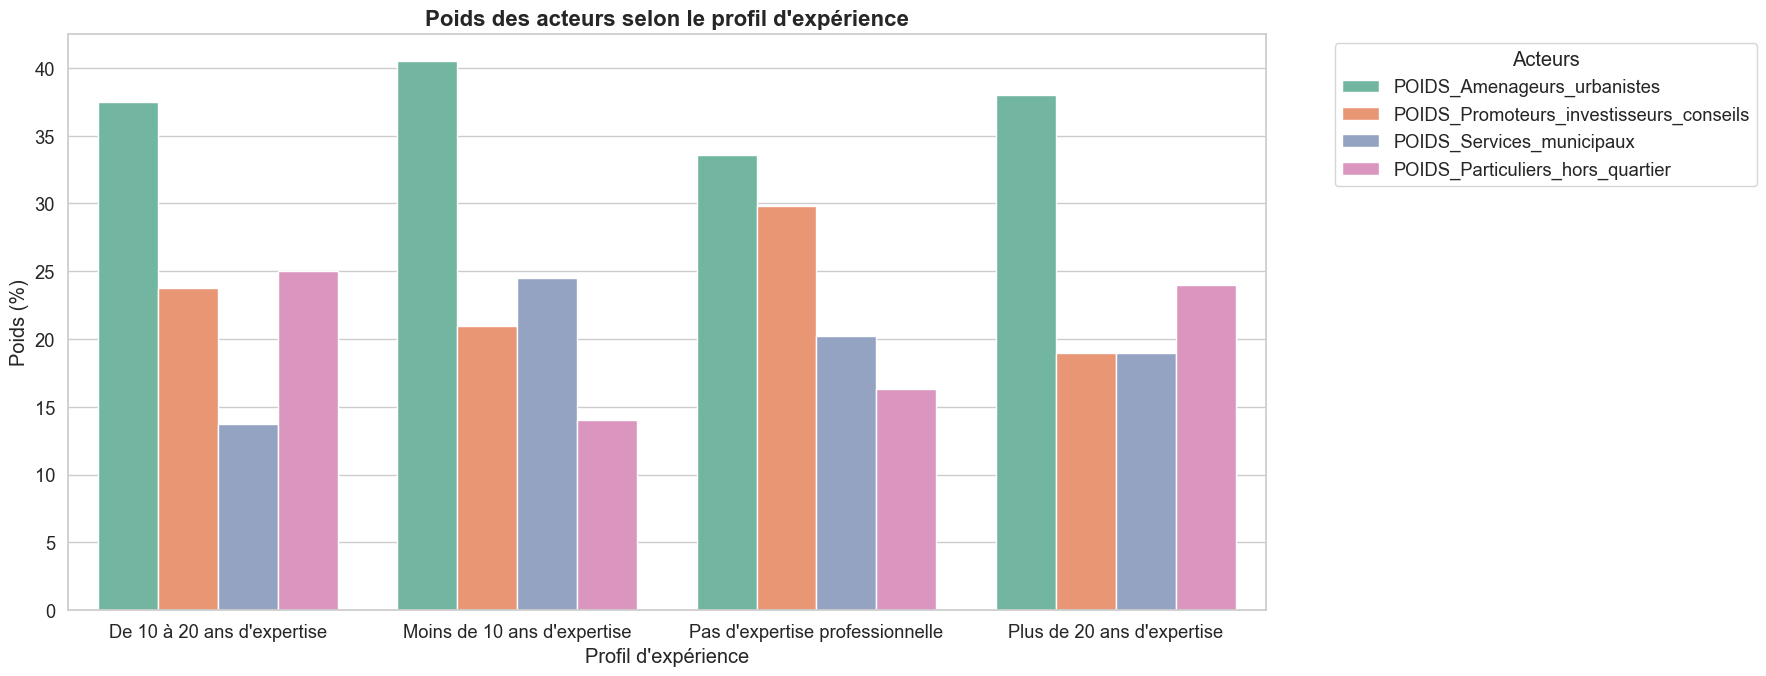

In [64]:
# mean_by_experience est déjà ton tableau agrégé
# On le remet en format long pour seaborn
df_long = (
    mean_by_experience
    .reset_index()
    .melt(id_vars="PROFIL_Experience_label",
          var_name="Acteur",
          value_name="Poids")
)

# Style du graphique
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(18, 7))
sns.barplot(
    data=df_long,
    x="PROFIL_Experience_label",
    y="Poids",
    hue="Acteur",
    palette="Set2"
)

# Titres et axes
plt.title("Poids des acteurs selon le profil d'expérience", fontsize=16, fontweight="bold")
plt.xlabel("Profil d'expérience")
plt.ylabel("Poids (%)")
plt.legend(title="Acteurs", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Les Aménageurs–Urbanistes apparaissent comme l’acteur dominant quel que soit le niveau d’expérience, tandis que les Promoteurs sont particulièrement valorisés par les non‑experts, les Services municipaux par les profils débutants, et les Particuliers par les profils les plus expérimentés.

* Poids moyens des blocs TOTAL

In [65]:
bloc_cols = {
    'Attractivité du quartier': 'QLT_VIE_Attractivite',
    'Sociabilités, interactions sociales': 'QLT_VIE_Sociabilites',
    'Fluidité des déplacements': 'QLT_VIE_Fluidite',
    'Salubrité de l’environnement': 'QLT_VIE_Salubrite'
}

bloc_weights = (
    data[list(bloc_cols.values())]
    .mean()
    .rename(index={v: k for k, v in bloc_cols.items()})
)
bloc_weights

Attractivité du quartier               24.838710
Sociabilités, interactions sociales    20.483871
Fluidité des déplacements              24.838710
Salubrité de l’environnement           29.838710
dtype: float64

* Sous-critères par bloc (Attractivité)

In [71]:
attr_cols = {
    'Esthétique': 'ATTR_Esthetique',
    'Offre commerciale': 'ATTR_Offre_commerciale',
    'Offre de services': 'ATTR_Offre_services',
    'Offre de loisirs': 'ATTR_Offre_loisirs',
    'Réputation': 'ATTR_Reputation'
}

attr_weights = (
    data[list(attr_cols.values())]
    .mean()
    .rename(index={v: k for k, v in attr_cols.items()})
)
attr_weights

Esthétique           24.677419
Offre commerciale    23.064516
Offre de services    21.129032
Offre de loisirs     15.161290
Réputation           15.967742
dtype: float64

* Sous-critères par bloc (Capacité du quartier  à favoriser  les  interactiosn sociale)

In [73]:
soc_cols  = {
    'Sociabilité en extérieur': 'SOC_Exterieur',
    'Sociabilité commerciale': 'SOC_Commerciale',
    'Mixité logements': 'SOC_Mixite_logements',
    'Sociabilité connectée': 'SOC_Connectee',
}

soc_weights = (
    data[list(soc_cols .values())]
    .mean()
    .rename(index={v: k for k, v in soc_cols .items()})
)
soc_weights

Sociabilité en extérieur    30.967742
Sociabilité commerciale     33.387097
Mixité logements            21.129032
Sociabilité connectée       14.516129
dtype: float64

* Sous-critères par bloc (la fluidité des déplacements dans le quartier)   

In [75]:
flu_cols = {
    'Structuration des rues': 'FLU_Structuration_rues',
    'Intermodalité': 'FLU_Intermodalite',
    'Déambulation': 'FLU_Deambulation_pietons_PMR',
    'Mobilités douces': 'FLU_Mobilites_douces',
    'Véhicules motorisés': 'FLU_Vehicules_motorises'
}

flu_weights = (
    data[list(flu_cols.values())]
    .mean()
    .rename(index={v: k for k, v in flu_cols.items()})
)

flu_weights

Structuration des rues    19.354839
Intermodalité             24.516129
Déambulation              22.580645
Mobilités douces          17.903226
Véhicules motorisés       15.645161
dtype: float64

* Sous-critères par bloc ( la capacité du quartier à fournir un environnement agréable et sûr,)   

In [77]:
sal_cols = {
    'Propreté': 'SAL_Proprete',
    'Calme': 'SAL_Calme',
    'Nature': 'SAL_Nature',
    'Sécurité': 'SAL_Securite'
}

sal_weights = (
    data[list(sal_cols.values())]
    .mean()
    .rename(index={v: k for k, v in sal_cols.items()})
)

sal_weights

Propreté    23.870968
Calme       23.548387
Nature      25.161290
Sécurité    27.419355
dtype: float64

* Calcul du POIDS FINAL (LE CŒUR  TABLEAU)

In [78]:
def build_block_table(bloc_name, bloc_weight, sub_weights):
    return pd.DataFrame({
        'Bloc': bloc_name,
        'Poids bloc (%)': bloc_weight,
        'Sous-critère': sub_weights.index,
        'Poids dans bloc (%)': sub_weights.values,
        'Poids final (%)': (bloc_weight / 100) * sub_weights.values
    })

table_attr = build_block_table(
    'Attractivité du quartier',
    bloc_weights['Attractivité du quartier'],
    attr_weights
)

table_soc = build_block_table(
    'Sociabilités, interactions sociales',
    bloc_weights['Sociabilités, interactions sociales'],
    soc_weights
)

table_flu = build_block_table(
    'Fluidité des déplacements',
    bloc_weights['Fluidité des déplacements'],
    flu_weights
)

table_sal = build_block_table(
    'Salubrité de l’environnement',
    bloc_weights['Salubrité de l’environnement'],
    sal_weights
)

final_table = pd.concat(
    [table_attr, table_soc, table_flu, table_sal],
    ignore_index=True
)

final_table


,Bloc,Poids bloc (%),Sous-critère,Poids dans bloc (%),Poids final (%)
0,Attractivité du quartier,24.838710,Esthétique,24.677419,6.129553
1,Attractivité du quartier,24.838710,Offre commerciale,23.064516,5.728928
2,Attractivité du quartier,24.838710,Offre de services,21.129032,5.248179
3,Attractivité du quartier,24.838710,Offre de loisirs,15.161290,3.765869
4,Attractivité du quartier,24.838710,Réputation,15.967742,3.966181
5,"Sociabilités, interactions sociales",20.483871,Sociabilité en extérieur,30.967742,6.343392
6,"Sociabilités, interactions sociales",20.483871,Sociabilité commerciale,33.387097,6.838970
7,"Sociabilités, interactions sociales",20.483871,Mixité logements,21.129032,4.328044
8,"Sociabilités, interactions sociales",20.483871,Sociabilité connectée,14.516129,2.973465
9,Fluidité des déplacements,24.838710,Structuration des rues,19.354839,4.807492


In [79]:
import plotly.express as px

fig = px.sunburst(
    final_table,
    path=['Bloc', 'Sous-critère'],
    values='Poids final (%)',
    title="Structure des déterminants de la qualité de vie"
)

fig.show()


#  La qualité de l'environnement urbain et naturel

* la qualité de l'environnement urbain et naturel du quartier

In [81]:
bloc2_cols = {
    'Structuration urbaine': 'QLT_ENV_STR_URBAINE',
    'Développement durable': 'QLT_ENV_DD',
    'Pérennité': 'QLT_ENV_Perennite',
    'Exposition aux risques': 'QLT_ENV_EXPORISK'
}

bloc2_weights = (
    data[list(bloc2_cols.values())]
    .mean()
    .rename(index={v: k for k, v in bloc2_cols.items()})
)

bloc2_weights, bloc2_weights.sum()


(Structuration urbaine     30.483871
 Développement durable     25.000000
 Pérennité                 23.870968
 Exposition aux risques    20.645161
 dtype: float64,
 np.float64(100.0))

*  la qualité de la structuration urbaine du quartier

In [83]:
stru_cols = {
    'Taille humaine': 'QLT_URB_Taille_humaine',
    'Compacité multifonctionnelle': 'QLT_URB_Compacite_multifonctionnelle',
    'Cohérence': 'QLT_URB_Coherence',
    'Mobilier urbain': 'QLT_URB_Mobilier_urbain'
}

stru_weights = (
    data[list(stru_cols.values())]
    .mean()
    .rename(index={v: k for k, v in stru_cols.items()})
)
stru_weights


Taille humaine                  26.677419
Compacité multifonctionnelle    26.612903
Cohérence                       24.774194
Mobilier urbain                 21.935484
dtype: float64

* la capacité du quartier à favoriser le développement durable

In [85]:
dur_cols = {
    'Végétalisation': 'CFDD_Vegetalisation',
    'Absence de pollutions': 'CFDD_Absence_pollutions',
    'Énergies durables': 'CFDD_Energies_durables',
    'Gestion durable intelligente': 'CFDD_Gestion_durable_intelligente',
    'Écosystèmes naturels': 'CFDD_Ecosystemes_naturels'
}

dur_weights = (
    data[list(dur_cols.values())]
    .mean()
    .rename(index={v: k for k, v in dur_cols.items()})
)
dur_weights


Végétalisation                  26.451613
Absence de pollutions           23.064516
Énergies durables               17.580645
Gestion durable intelligente    15.806452
Écosystèmes naturels            17.096774
dtype: float64

* Capacité du quartier à supporter le passage du temps

In [87]:
per_cols = {
    'Capacité à évoluer': 'PER_Capacite_evoluer',
    'Santé bâtiments/rues': 'PER_Sante_batiments_voirie',
    'Stabilité économique': 'PER_Stabilite_economique'
}

per_weights = (
    data[list(per_cols.values())]
    .mean()
    .rename(index={v: k for k, v in per_cols.items()})
)
per_weights 


Capacité à évoluer      30.645161
Santé bâtiments/rues    39.677419
Stabilité économique    29.677419
dtype: float64

*  le degré d'exposition aux risques

In [89]:
ris_cols = {
    "Risques d’exploitation": 'DER_Exploitation_fonctionnement',
    'Risques technologiques': 'DER_Technologiques',
    'Risques naturels': 'DER_Naturels'
}

ris_weights = (
    data[list(ris_cols.values())]
    .mean()
    .rename(index={v: k for k, v in ris_cols.items()})
)
ris_weights 


Risques d’exploitation    36.451613
Risques technologiques    28.548387
Risques naturels          35.000000
dtype: float64

In [90]:
def build_block_table(bloc_name, bloc_weight, sub_weights):
    return pd.DataFrame({
        'Bloc': bloc_name,
        'Poids bloc (%)': bloc_weight,
        'Sous-critère': sub_weights.index,
        'Poids dans bloc (%)': sub_weights.values,
        'Poids final (%)': (bloc_weight / 100) * sub_weights.values
    })

table_stru = build_block_table('Structuration urbaine', bloc2_weights['Structuration urbaine'], stru_weights)
table_dur  = build_block_table('Développement durable',  bloc2_weights['Développement durable'],  dur_weights)
table_per  = build_block_table('Pérennité',              bloc2_weights['Pérennité'],              per_weights)
table_ris  = build_block_table('Exposition aux risques', bloc2_weights['Exposition aux risques'], ris_weights)

final_table_env = pd.concat([table_stru, table_dur, table_per, table_ris], ignore_index=True)

final_table_env


,Bloc,Poids bloc (%),Sous-critère,Poids dans bloc (%),Poids final (%)
0,Structuration urbaine,30.483871,Taille humaine,26.677419,8.132310
1,Structuration urbaine,30.483871,Compacité multifonctionnelle,26.612903,8.112643
2,Structuration urbaine,30.483871,Cohérence,24.774194,7.552133
3,Structuration urbaine,30.483871,Mobilier urbain,21.935484,6.686785
4,Développement durable,25.000000,Végétalisation,26.451613,6.612903
5,Développement durable,25.000000,Absence de pollutions,23.064516,5.766129
6,Développement durable,25.000000,Énergies durables,17.580645,4.395161
7,Développement durable,25.000000,Gestion durable intelligente,15.806452,3.951613
8,Développement durable,25.000000,Écosystèmes naturels,17.096774,4.274194
9,Pérennité,23.870968,Capacité à évoluer,30.645161,7.315297


# la qualité de localisation du quartier

* la qualité de la localisation du quartier

In [93]:
bloc3_cols = {
    "Connexion à l’agglomération": "QLQ_Connexion_Aglomeration",
    "Rang du quartier et de l’agglomération": "QLQ_Rang_Aglomeration"
}

bloc3_weights = (
    data[list(bloc3_cols.values())]
    .mean()
    .rename(index={v: k for k, v in bloc3_cols.items()})
)

bloc3_weights, bloc3_weights.sum()


(Connexion à l’agglomération               61.290323
 Rang du quartier et de l’agglomération    38.709677
 dtype: float64,
 np.float64(100.0))

* Connexion à l’agglomération

In [95]:
conn_cols = {
    "Transports en commun": "LOC_Transport_Commun",
    "Transports longue distance": "LOC_Transports_longue_distance",
    "Connexion routière": "LOC_Connexion_routiere"
}

conn_weights = (
    data[list(conn_cols.values())]
    .mean()
    .rename(index={v: k for k, v in conn_cols.items()})
)

conn_weights, conn_weights.sum()


(Transports en commun          44.516129
 Transports longue distance    27.258065
 Connexion routière            28.225806
 dtype: float64,
 np.float64(100.0))

*  le rang du quartier

In [96]:
rang_cols = {
    "Hiérarchie inter-quartiers": "HRCHIE_INT_Quartier",
    "Hiérarchie agglomération": "HRCHIE_Agglomeration"
}

rang_weights = (
    data[list(rang_cols.values())]
    .mean()
    .rename(index={v: k for k, v in rang_cols.items()})
)

rang_weights, rang_weights.sum()


(Hiérarchie inter-quartiers    52.258065
 Hiérarchie agglomération      47.741935
 dtype: float64,
 np.float64(100.0))

In [98]:
def build_block_table(bloc_name, bloc_weight, sub_weights):
    return pd.DataFrame({
        "Bloc": bloc_name,
        "Poids bloc (%)": bloc_weight,
        "Sous-critère": sub_weights.index,
        "Poids dans bloc (%)": sub_weights.values,
        "Poids final (%)": (bloc_weight / 100) * sub_weights.values
    })

table_conn = build_block_table(
    "Connexion à l’agglomération",
    bloc3_weights["Connexion à l’agglomération"],
    conn_weights
)

table_rang = build_block_table(
    "Rang du quartier et de l’agglomération",
    bloc3_weights["Rang du quartier et de l’agglomération"],
    rang_weights
)

final_table_loc = pd.concat([table_conn, table_rang], ignore_index=True)

final_table_loc


,Bloc,Poids bloc (%),Sous-critère,Poids dans bloc (%),Poids final (%)
0,Connexion à l’agglomération,61.290323,Transports en commun,44.516129,27.284079
1,Connexion à l’agglomération,61.290323,Transports longue distance,27.258065,16.706556
2,Connexion à l’agglomération,61.290323,Connexion routière,28.225806,17.299688
3,Rang du quartier et de l’agglomération,38.709677,Hiérarchie inter-quartiers,52.258065,20.228928
4,Rang du quartier et de l’agglomération,38.709677,Hiérarchie agglomération,47.741935,18.480749


Les résultats montrent que la qualité de la localisation d’un quartier est majoritairement associée à sa capacité de connexion à l’agglomération (61 %), et en particulier à l’accessibilité par les transports en commun, qui constitue le premier déterminant. Le rang du quartier et de l’agglomération joue un rôle secondaire, traduisant une perception de la localisation davantage fondée sur l’usage quotidien que sur le positionnement symbolique ou métropolitain.

# Quelle dimension compte le plus dans l’évaluation globale réelle d’un quartier ?

In [103]:
global_cols = {
    "Qualité de vie": "GLOB_Qualite_vie_Quartier",
    "Qualité de l’environnement urbain et naturel": "GLOB_Env_urbain_naturel_Quartier",
    "Qualité de la localisation": "GLOB_Localisation_Quartier"
}

global_weights = (
    data[list(global_cols.values())]
    .mean()
    .rename(index={v: k for k, v in global_cols.items()})
)

final_global = pd.DataFrame({
    "Dimension": global_weights.index,
    "Poids global moyen (%)": global_weights.values
})

final_global



,Dimension,Poids global moyen (%)
0,Qualité de vie,37.903226
1,Qualité de l’environnement urbain et naturel,31.129032
2,Qualité de la localisation,30.967742


La qualité de vie constitue la dimension la plus structurante, mais l’environnement urbain et naturel ainsi que la localisation jouent un rôle presque équivalent dans l’évaluation globale d’un quartier.